In [1]:
# Основные понятия в машинном обучении
# Гиперпараметры

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Шаг 1: Загрузка датасета
digits = load_digits()
X = digits.data
y = digits.target

# Шаг 2: Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Шаг 3: Определение диапазонов гиперпараметров
n_estimators_range = [10, 50, 100, 200]
max_depth_range = [None, 10, 20, 30]

# Шаг 4: Обучение моделей с разными гиперпараметрами и сбор результатов
results = []

for n in n_estimators_range:
    for depth in max_depth_range:
        # Создание модели с текущими гиперпараметрами
        clf = RandomForestClassifier(n_estimators=n, max_depth=depth, random_state=42, n_jobs=-1)

        # Обучение модели
        clf.fit(X_train, y_train)

        # Предсказание на тестовой выборке
        y_pred = clf.predict(X_test)

        # Вычисление точности
        accuracy = accuracy_score(y_test, y_pred)

        # Сохранение результатов
        results.append({
            'n_estimators': n,
            'max_depth': depth,
            'accuracy': accuracy
        })

# Преобразование результатов в DataFrame
results_df = pd.DataFrame(results)

# Шаг 5: Создание сводной таблицы для тепловой карты с использованием именованных аргументов
pivot_table = results_df.pivot(index="n_estimators", columns="max_depth", values="accuracy")

# Шаг 6: Визуализация результатов
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".4f", cmap="YlGnBu")
plt.title("Влияние n_estimators и max_depth на точность модели")
plt.ylabel("n_estimators")
plt.xlabel("max_depth")
plt.show()


: 

In [3]:
# Добавим еще два гиперпараметра

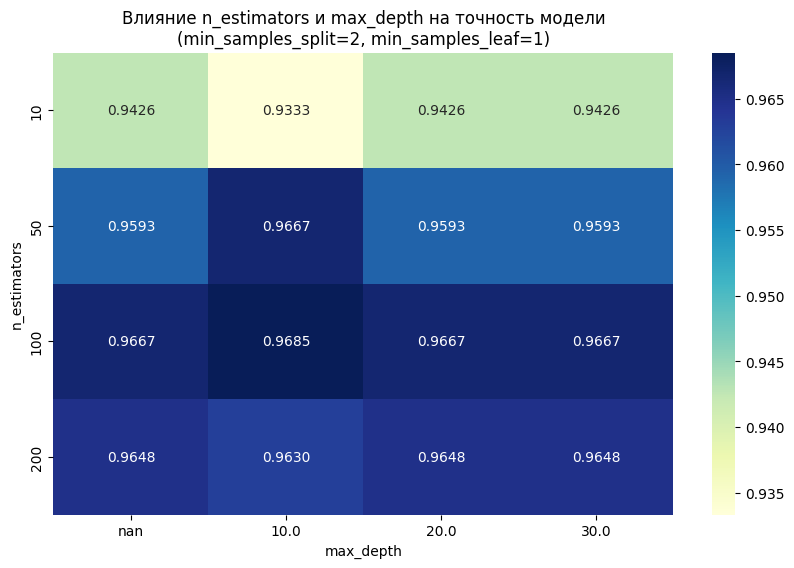

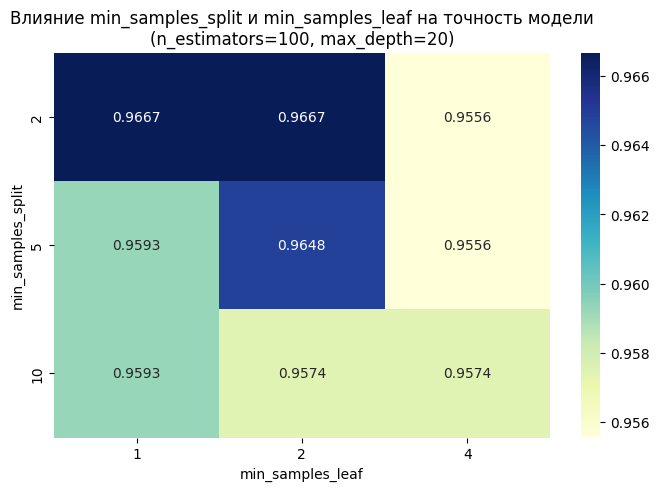

Лучшие гиперпараметры:
n_estimators         100.000000
max_depth             10.000000
min_samples_split      2.000000
min_samples_leaf       1.000000
accuracy               0.968519
Name: 81, dtype: float64


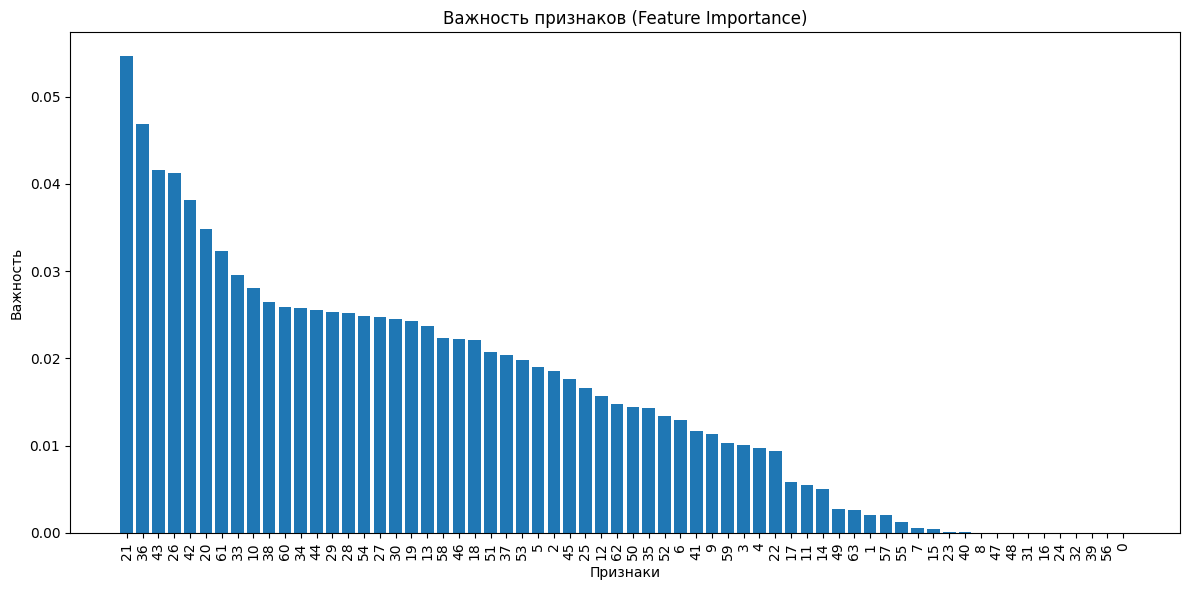

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Шаг 1: Загрузка датасета
digits = load_digits()
X = digits.data
y = digits.target

# Шаг 2: Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Шаг 3: Определение диапазонов гиперпараметров
n_estimators_range = [10, 50, 100, 200]
max_depth_range = [None, 10, 20, 30]
min_samples_split_range = [2, 5, 10]
min_samples_leaf_range = [1, 2, 4]

# Шаг 4: Обучение моделей с разными гиперпараметрами и сбор результатов
results = []

for n in n_estimators_range:
    for depth in max_depth_range:
        for split in min_samples_split_range:
            for leaf in min_samples_leaf_range:
                # Создание модели с текущими гиперпараметрами
                clf = RandomForestClassifier(
                    n_estimators=n,
                    max_depth=depth,
                    min_samples_split=split,
                    min_samples_leaf=leaf,
                    random_state=42,
                    n_jobs=-1
                )

                # Обучение модели
                clf.fit(X_train, y_train)

                # Предсказание на тестовой выборке
                y_pred = clf.predict(X_test)

                # Вычисление точности
                accuracy = accuracy_score(y_test, y_pred)

                # Сохранение результатов
                results.append({
                    'n_estimators': n,
                    'max_depth': depth,
                    'min_samples_split': split,
                    'min_samples_leaf': leaf,
                    'accuracy': accuracy
                })

# Преобразование результатов в DataFrame
results_df = pd.DataFrame(results)

# Шаг 5.1: Влияние n_estimators и max_depth при фиксированных min_samples_split=2 и min_samples_leaf=1
filtered_results = results_df[
    (results_df['min_samples_split'] == 2) &
    (results_df['min_samples_leaf'] == 1)
]

pivot_table = filtered_results.pivot(index="n_estimators", columns="max_depth", values="accuracy")

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".4f", cmap="YlGnBu")
plt.title("Влияние n_estimators и max_depth на точность модели\n(min_samples_split=2, min_samples_leaf=1)")
plt.ylabel("n_estimators")
plt.xlabel("max_depth")
plt.show()

# Шаг 5.2: Влияние min_samples_split и min_samples_leaf при фиксированных n_estimators=100 и max_depth=20
fixed_results = results_df[
    (results_df['n_estimators'] == 100) &
    (results_df['max_depth'] == 20)
]

pivot_table_split_leaf = fixed_results.pivot(
    index="min_samples_split",
    columns="min_samples_leaf",
    values="accuracy"
)

plt.figure(figsize=(8, 5))
sns.heatmap(pivot_table_split_leaf, annot=True, fmt=".4f", cmap="YlGnBu")
plt.title("Влияние min_samples_split и min_samples_leaf на точность модели\n(n_estimators=100, max_depth=20)")
plt.ylabel("min_samples_split")
plt.xlabel("min_samples_leaf")
plt.show()

# Шаг 6: Анализ параметров модели (Важность признаков)
# Найдём комбинацию гиперпараметров с максимальной точностью
best_result = results_df.loc[results_df['accuracy'].idxmax()]
print("Лучшие гиперпараметры:")
print(best_result)

# Корректировка типов гиперпараметров перед передачей в модель
n_estimators = int(best_result['n_estimators'])
max_depth = best_result['max_depth']
if max_depth is not None:
    max_depth = int(max_depth)
min_samples_split = int(best_result['min_samples_split'])
min_samples_leaf = int(best_result['min_samples_leaf'])

# Создание и обучение лучшей модели с новыми типами гиперпараметров
best_clf = RandomForestClassifier(
    n_estimators=n_estimators,
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf,
    random_state=42,
    n_jobs=-1
)
best_clf.fit(X_train, y_train)

# Получение важности признаков
importances = best_clf.feature_importances_
indices = np.argsort(importances)[::-1]

# Визуализация важности признаков
plt.figure(figsize=(12, 6))
plt.title("Важность признаков (Feature Importance)")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), indices, rotation=90)  # Поворот меток на 90 градусов
plt.xlabel("Признаки")
plt.ylabel("Важность")
plt.tight_layout()
plt.show()


In [5]:
# Типы данных и задачи машинного обучения.
# Пространственные данные

In [6]:
# https://www.kaggle.com/datasets/census/us-population-by-zip-code?resource=download - датасет популяции
# # Национальный архив данных о районах (NaNDA): объем трафика по почтовым индексам, США, 1963-2019 гг.
# https://www.openicpsr.org/openicpsr/project/160262/version/V1/view?path=/openicpsr/160262/fcr:versions/V1.3/nanda_trfvolni_tract_1963-2019_01P_csv_with_readme.zip&type=file - транспортные потоки

In [7]:
!pip install pandas numpy scikit-learn folium uszipcode python-Levenshtein

   population  minimum_age  maximum_age  gender  zipcode          geo_id
0          50         30.0         34.0  female    61747  8600000US61747
1           5         85.0          NaN    male    64120  8600000US64120
2        1389         30.0         34.0    male    95117  8600000US95117
3         231         60.0         61.0  female    74074  8600000US74074
4          56          0.0          4.0  female    58042  8600000US58042


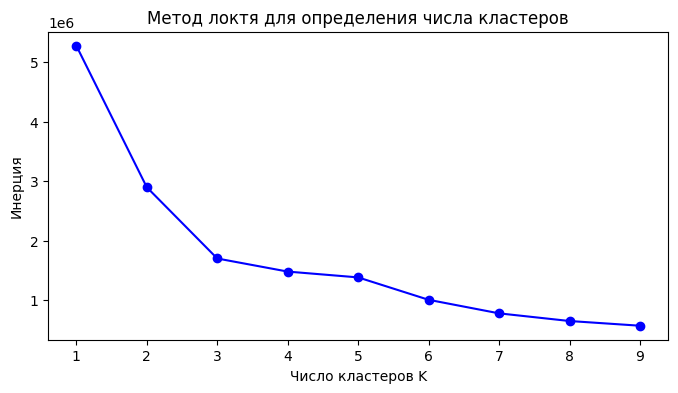

           population  minimum_age  maximum_age
cluster                                        
0          169.113626    64.909091    65.900000
1          436.591254    20.083333    22.833333
2        23381.921802          NaN          NaN
cluster
1    875747
0    728618
2     18466
Name: count, dtype: int64


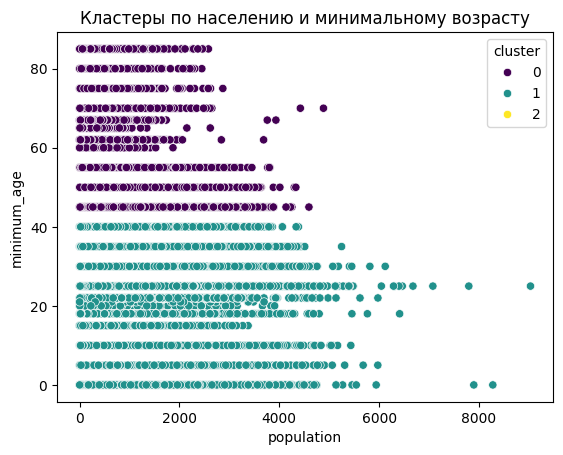

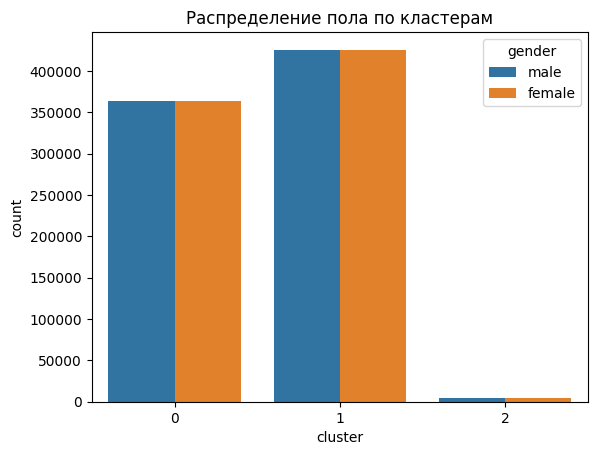

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
data = pd.read_csv('population_by_zip_2010.csv')

# Предварительный просмотр данных
print(data.head())

# Обработка пропущенных значений
# Для числовых столбцов используем медиану
numeric_features = ['population', 'minimum_age', 'maximum_age']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Для категориальных столбцов используем one-hot encoding
categorical_features = ['gender']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='if_binary'))])  # Используем drop='if_binary', чтобы избежать дублирования

# Объединяем трансформеры
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Применяем предварительную обработку
X = preprocessor.fit_transform(data)

# Определение оптимального числа кластеров с помощью метода локтя
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Визуализация метода локтя
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Число кластеров K')
plt.ylabel('Инерция')
plt.title('Метод локтя для определения числа кластеров')
plt.show()

# Предположим, что оптимальное K=3
k_opt = 3
kmeans = KMeans(n_clusters=k_opt, random_state=42)
clusters = kmeans.fit_predict(X)

# Добавляем кластеры в исходные данные
data['cluster'] = clusters

# Анализ кластеров
# Выбираем только числовые столбцы для агрегации
numeric_columns = ['population', 'minimum_age', 'maximum_age']
cluster_means = data.groupby('cluster')[numeric_columns].mean()
print(cluster_means)

# Количество объектов в каждом кластере
print(data['cluster'].value_counts())

# Визуализация кластеров (например, по population и minimum_age)
sns.scatterplot(data=data, x='population', y='minimum_age', hue='cluster', palette='viridis')
plt.title('Кластеры по населению и минимальному возрасту')
plt.show()

# Дополнительная визуализация: распределение пола в кластерах
sns.countplot(data=data, x='cluster', hue='gender')
plt.title('Распределение пола по кластерам')
plt.show()


In [9]:
# Текстовые данные

In [10]:
!pip install nltk

In [11]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

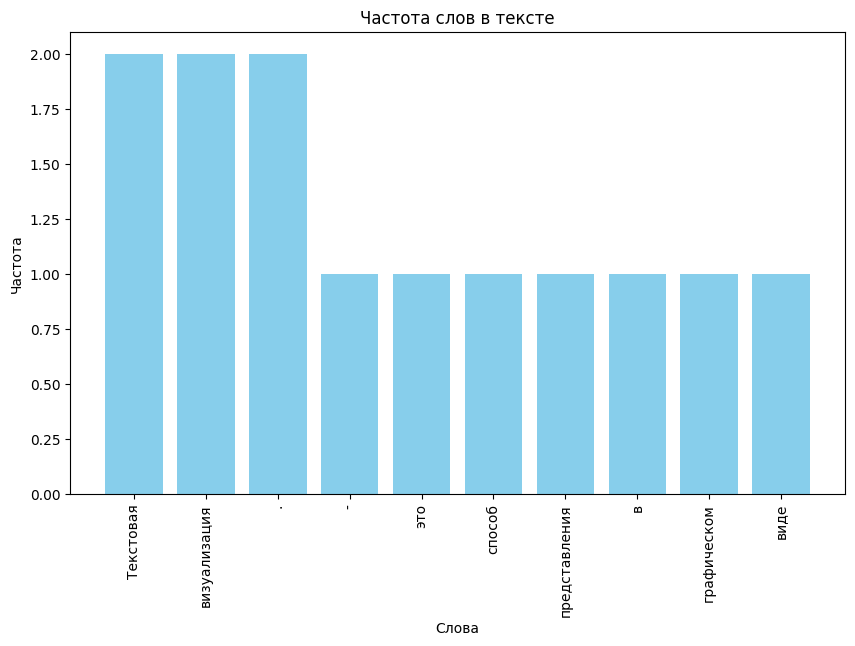

In [12]:
import matplotlib.pyplot as plt
import nltk
from nltk import FreqDist
from nltk.tokenize import word_tokenize

# Пример текстовых данных
text = "Текстовая визуализация. Текстовая визуализация - это способ представления в графическом виде."

# Токенизируем текст на слова
words = word_tokenize(text)

# Создаем объект FreqDist для подсчета частоты слов
freq_dist = FreqDist(words)

# Получаем наиболее часто встречающиеся слова (например, топ 10)
top_words = freq_dist.most_common(10)

# Извлекаем слова и их частоты
words, frequencies = zip(*top_words)

# Создаем график частоты слов
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies, color='skyblue')
plt.title('Частота слов в тексте')
plt.xlabel('Слова')
plt.ylabel('Частота')
plt.xticks(rotation=90)

# Отображаем график
plt.show()

In [13]:
# Классификация

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Загрузка датасета "Диабет"
diabetes = datasets.load_diabetes()

# Преобразование задачи в бинарную классификацию: если целевое значение больше медианы, то 1, иначе 0
y = (diabetes.target > np.median(diabetes.target)).astype(int)

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, y, test_size=0.2, random_state=42)

# Нормализация признаков
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Обучение модели классификации (SVM)
model = SVC(kernel='linear', C=1)
model.fit(X_train, y_train)

# Предсказание на тестовом наборе
y_pred = model.predict(X_test)

# Метрики качества
print("Метрики качества:")
print(classification_report(y_test, y_pred))

# Матрица ошибок
conf_matrix = confusion_matrix(y_test, y_pred)
print("Матрица ошибок:")
print(conf_matrix)

# Точность модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy}")

Метрики качества:
              precision    recall  f1-score   support

           0       0.78      0.71      0.74        49
           1       0.68      0.75      0.71        40

    accuracy                           0.73        89
   macro avg       0.73      0.73      0.73        89
weighted avg       0.73      0.73      0.73        89

Матрица ошибок:
[[35 14]
 [10 30]]
Точность модели: 0.7303370786516854


Fitting 5 folds for each of 96 candidates, totalling 480 fits
Лучшие параметры: {'feature_selection__k': 9, 'svm__C': 100, 'svm__gamma': 'scale', 'svm__kernel': 'linear'}
Метрики качества:
              precision    recall  f1-score   support

           0       0.78      0.69      0.73        45
           1       0.71      0.80      0.75        44

    accuracy                           0.74        89
   macro avg       0.74      0.74      0.74        89
weighted avg       0.74      0.74      0.74        89

Матрица ошибок:
[[31 14]
 [ 9 35]]
Точность модели: 0.7416


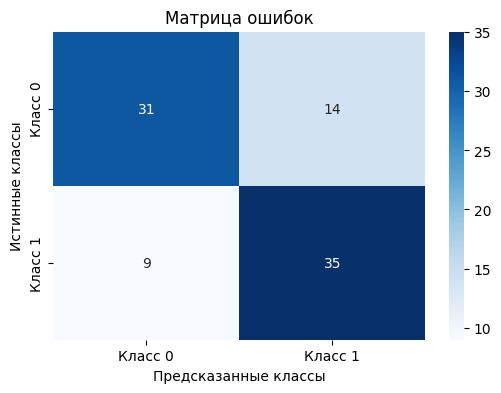

In [15]:
# Улучшим базовый пример классификации:

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif

# Загрузка датасета "Диабет"
diabetes = datasets.load_diabetes()

# Преобразование задачи в бинарную классификацию: если целевое значение больше медианы, то 1, иначе 0
y = (diabetes.target > np.median(diabetes.target)).astype(int)
X = diabetes.data

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Создание пайплайна с предварительной обработкой, выбором признаков и моделью SVM
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', SelectKBest(score_func=f_classif)),
    ('svm', SVC())
])

# Определение сетки гиперпараметров для поиска
param_grid = {
    'feature_selection__k': [5, 7, 9, 11],  # Выбор числа лучших признаков
    'svm__C': [0.1, 1, 10, 100],
    'svm__kernel': ['linear', 'rbf', 'poly'],
    'svm__gamma': ['scale', 'auto']
}

# Настройка GridSearchCV с кросс-валидацией
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Обучение модели с поиском гиперпараметров
grid_search.fit(X_train, y_train)

# Вывод лучших параметров
print("Лучшие параметры:", grid_search.best_params_)

# Предсказание на тестовом наборе с использованием лучшей модели
y_pred = grid_search.predict(X_test)

# Метрики качества
print("Метрики качества:")
print(classification_report(y_test, y_pred))

# Матрица ошибок
conf_matrix = confusion_matrix(y_test, y_pred)
print("Матрица ошибок:")
print(conf_matrix)

# Точность модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy:.4f}")

# Визуализация матрицы ошибок
import seaborn as sns

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Класс 0', 'Класс 1'], yticklabels=['Класс 0', 'Класс 1'])
plt.xlabel('Предсказанные классы')
plt.ylabel('Истинные классы')
plt.title('Матрица ошибок')
plt.show()


In [16]:
# Матрица ошибок первой модели:
# [[35 14]
# [10 30]]
# Точность модели: 0.7303

# Матрица ошибок второй модели:
# [[31 14]
# [ 9 35]]
# Точность модели: 0.7416

In [17]:
# Регрессия

Mean Squared Error (MSE): 0.5792224848666966
R-squared (R2): 0.5579834277049536


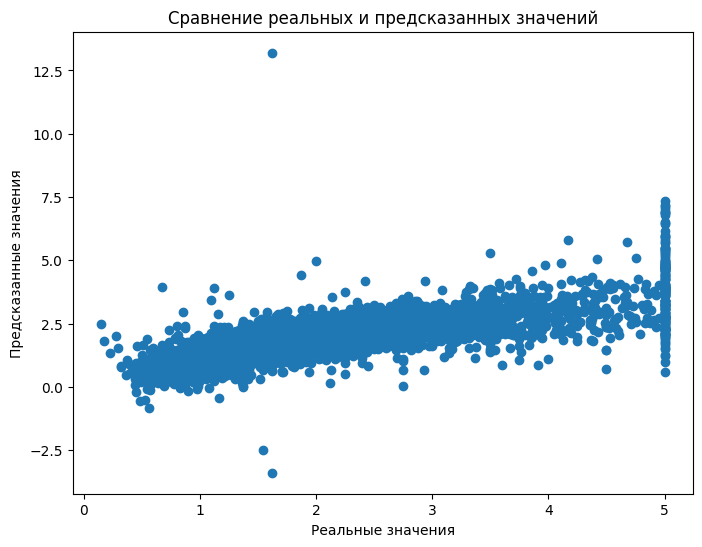

In [18]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Загрузка датасета "California housing"
california_housing = fetch_california_housing()
X = california_housing.data
y = california_housing.target

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Нормализация признаков
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Обучение модели регрессии (SVR)
model = SVR(kernel='linear', C=1)
model.fit(X_train, y_train)

# Предсказание на тестовом наборе
y_pred = model.predict(X_test)

# Метрики качества
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

# Визуализация результатов (пример)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Реальные значения")
plt.ylabel("Предсказанные значения")
plt.title("Сравнение реальных и предсказанных значений")
plt.show()


In [19]:
 # Mean Squared Error (MSE) - Среднеквадратическая ошибка
 # Это мера, которая измеряет среднеквадратичное отклонение между
 # фактическими значениями (вашими реальными данными)
 # и предсказанными значениями, полученными вашей моделью.

 # R-squared (R2) - Коэффициент детерминации, R2 принимает значения от 0 до 1. Показывает изменчивость в данных.
 # Модель объясняет примерно 55.8% изменчивости в ваших данных

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64
Размер обучающей выборки: (16512, 8)
Размер тестовой выборки: (4128, 8)
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Лучшие параметры: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samp

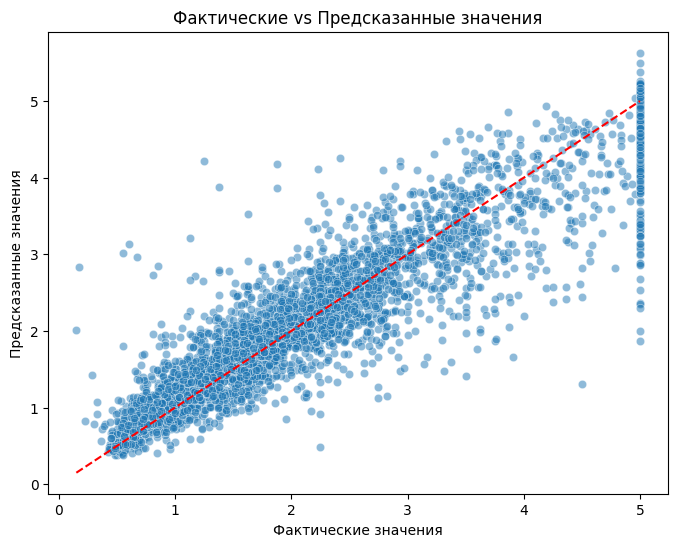

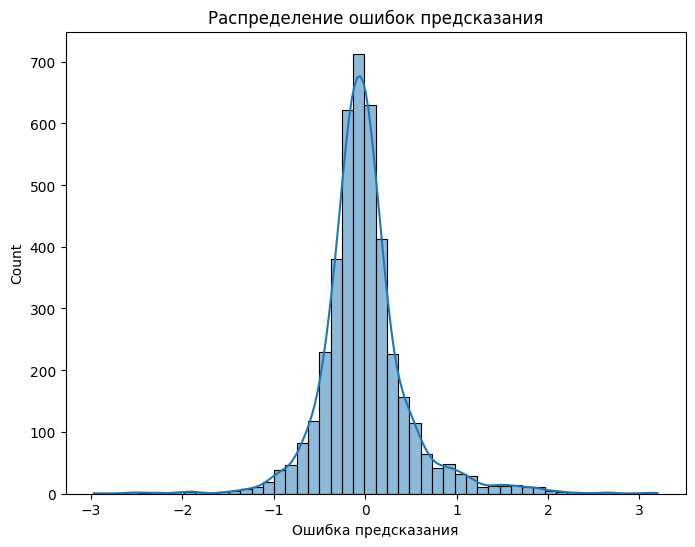

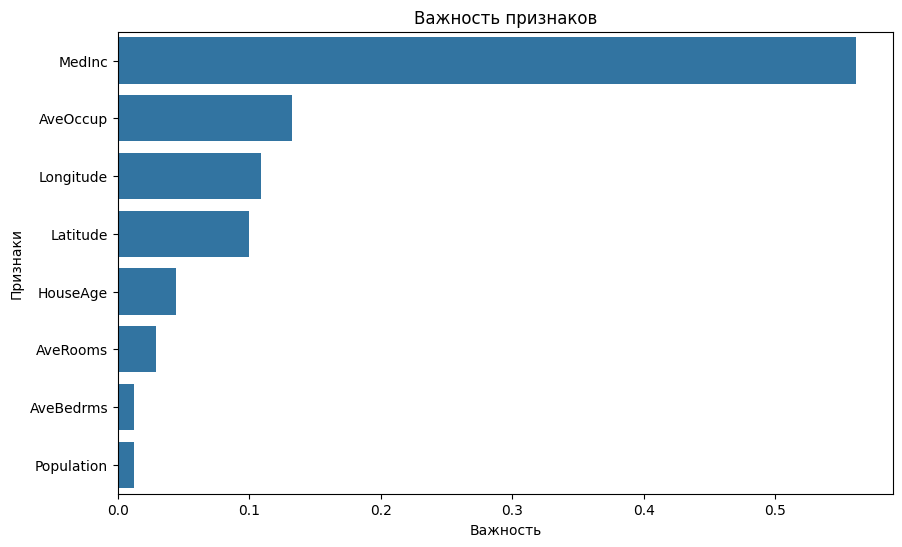

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Шаг 1: Загрузка датасета
california = fetch_california_housing(as_frame=True)
X = california.data
y = california.target

# Шаг 2: Исследование данных
print(X.head())
print(y.head())
print(X.isnull().sum())

# Шаг 3: Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")

# Шаг 4: Предобработка данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Шаг 5: Обучение модели с настройкой гиперпараметров
gbr = GradientBoostingRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 3]
}
grid_search = GridSearchCV(
    estimator=gbr,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='neg_mean_squared_error',
    verbose=2
)
grid_search.fit(X_train_scaled, y_train)
print("Лучшие параметры:", grid_search.best_params_)

# Шаг 6: Оценка модели
best_gbr = grid_search.best_estimator_
y_pred = best_gbr.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R^2 Score: {r2:.4f}")

# Шаг 7.1: Визуализация фактических и предсказанных значений
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Фактические vs Предсказанные значения')
plt.show()

# Шаг 7.2: Визуализация распределения ошибок
errors = y_test - y_pred

plt.figure(figsize=(8,6))
sns.histplot(errors, bins=50, kde=True)
plt.xlabel('Ошибка предсказания')
plt.title('Распределение ошибок предсказания')
plt.show()

# Шаг 7.3: Важность признаков
feature_importances = best_gbr.feature_importances_
features = X.columns

importance_df = pd.DataFrame({
    'Признак': features,
    'Важность': feature_importances
}).sort_values(by='Важность', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Важность', y='Признак', data=importance_df)
plt.title('Важность признаков')
plt.xlabel('Важность')
plt.ylabel('Признаки')
plt.show()


In [21]:
# Дисбаланс классов

In [22]:
# информативная визуализация
import plotly.express as px
import pandas as pd
from sklearn.datasets import fetch_california_housing

# Загрузка датасета "California Housing Prices"
california_housing = fetch_california_housing(as_frame=True)
df = pd.DataFrame(data=california_housing.data, columns=california_housing.feature_names)
df['target'] = california_housing.target

# Создание интерактивного графика с использованием Plotly
fig = px.scatter_geo(
    df,
    lon=df["Longitude"], # координаты долготы
    lat=df["Latitude"],  # координаты ширины
    color=df["target"],  # Цветовая шкала на основе цен на жилье
    size=df["target"],   # Размер маркеров на основе цен на жилье
    hover_name="target", # Всплывающая информация при наведении мыши
    title="Цены на жилье в Калифорнии",
)

fig.update_geos(
    center=dict(lon=-119, lat=36),  # Центрирование карты на Калифорнии
    projection_scale=5            # Масштабирование карты
)

fig.show()


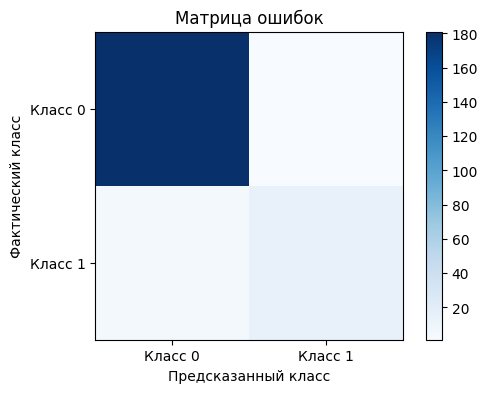

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Создание синтетического датасета с дисбалансом классов
#
X, y = make_classification(n_samples=1000, n_features=2, weights=[0.9, 0.1], n_informative=2, n_redundant=0, random_state=42)

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели (например, логистической регрессии)
model = LogisticRegression()
model.fit(X_train, y_train)

# Предсказание на тестовом наборе
y_pred = model.predict(X_test)

# Расчет матрицы ошибок
cm = confusion_matrix(y_test, y_pred)

# Визуализация матрицы ошибок
plt.figure(figsize=(6, 4))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Матрица ошибок')
plt.colorbar()
classes = ['Класс 0', 'Класс 1']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.xlabel('Предсказанный класс')
plt.ylabel('Фактический класс')
plt.show()


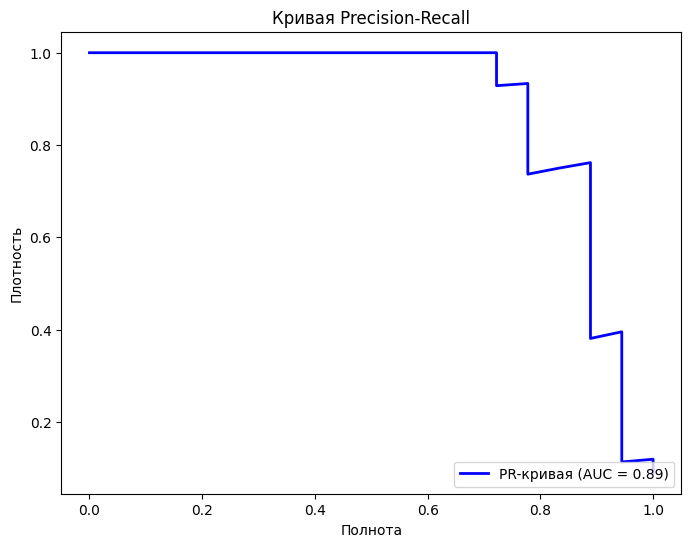

In [24]:
from sklearn.metrics import precision_recall_curve, auc

# Получение вероятностей положительного класса
y_scores = model.predict_proba(X_test)[:, 1]

# Вычисление точности и полноты для разных порогов
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Вычисление площади под PR-кривой
area_under_curve = auc(recall, precision)

# Визуализация PR-кривой
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', lw=2, label='PR-кривая (AUC = %0.2f)' % area_under_curve)
plt.xlabel('Полнота')
plt.ylabel('Плотность')
plt.title('Кривая Precision-Recall')
plt.legend(loc='lower right')
plt.show()


In [25]:
# Как достичь сбалансированных классов:

Загрузка датасета 'California Housing'...


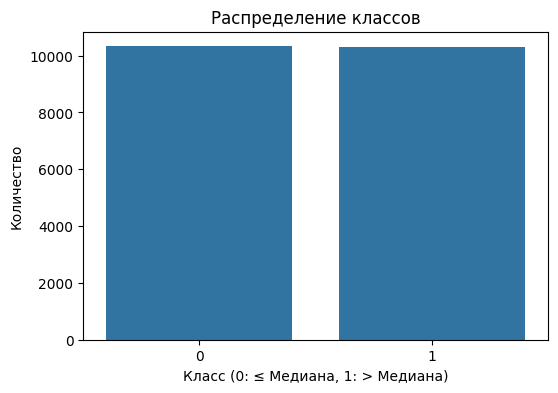

Распределение классов:
MedHouseVal
0    10323
1    10317
Name: count, dtype: int64

Размер обучающей выборки: (16512, 8)
Размер тестовой выборки: (4128, 8)

Распределение классов в обучающей выборке:
MedHouseVal
0    8258
1    8254
Name: count, dtype: int64


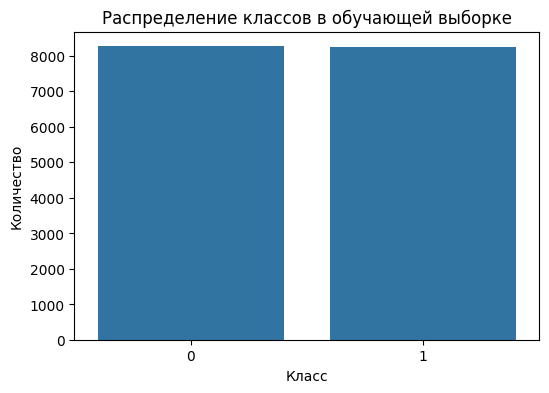


Доля классов в обучающей выборке:
MedHouseVal
0    0.500121
1    0.499879
Name: count, dtype: float64

Распределение классов после Random Oversampling:
MedHouseVal
1    8258
0    8258
Name: count, dtype: int64


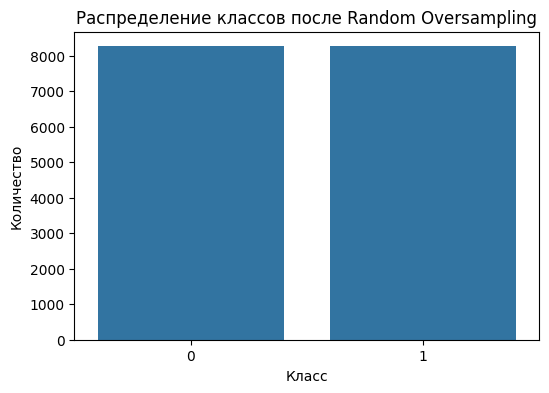


Распределение классов после SMOTE:
MedHouseVal
1    8258
0    8258
Name: count, dtype: int64


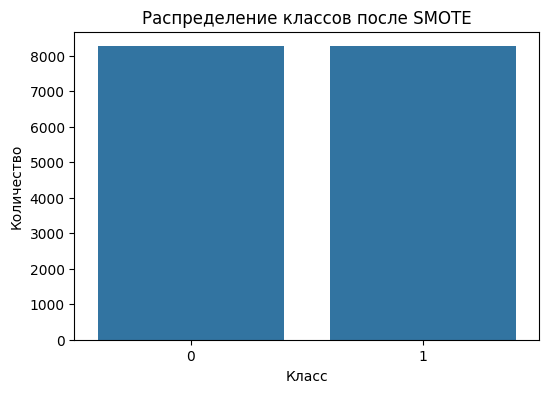


Распределение классов после Random Undersampling:
MedHouseVal
0    8254
1    8254
Name: count, dtype: int64


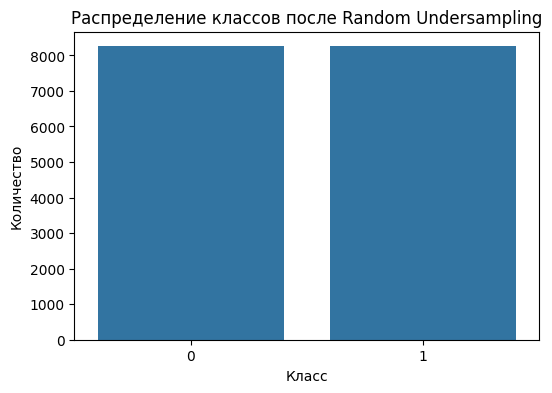


Распределение классов после SMOTE + Tomek Links:
MedHouseVal
0    6658
1    6658
Name: count, dtype: int64


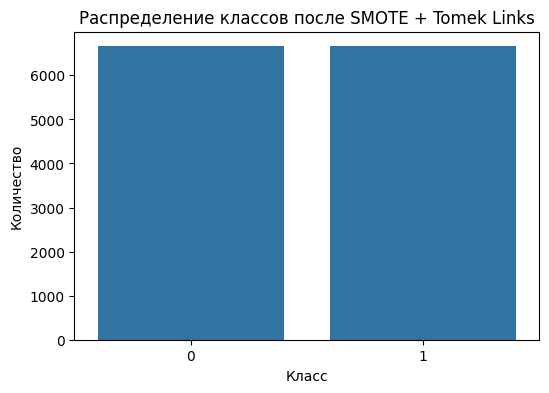

--- Базовая модель (без балансировки) ---
Метрики качества:
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      2065
           1       0.89      0.88      0.89      2063

    accuracy                           0.89      4128
   macro avg       0.89      0.89      0.89      4128
weighted avg       0.89      0.89      0.89      4128

Точность (Accuracy): 0.8861
AUC-ROC: 0.9575

Матрица ошибок:
[[1840  225]
 [ 245 1818]]


--- Модель после Random Oversampling ---
Метрики качества:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      2065
           1       0.89      0.88      0.89      2063

    accuracy                           0.89      4128
   macro avg       0.89      0.89      0.89      4128
weighted avg       0.89      0.89      0.89      4128

Точность (Accuracy): 0.8881
AUC-ROC: 0.9571

Матрица ошибок:
[[1842  223]
 [ 239 1824]]


--- Модель после SMOTE ---
Метрики качества:
  

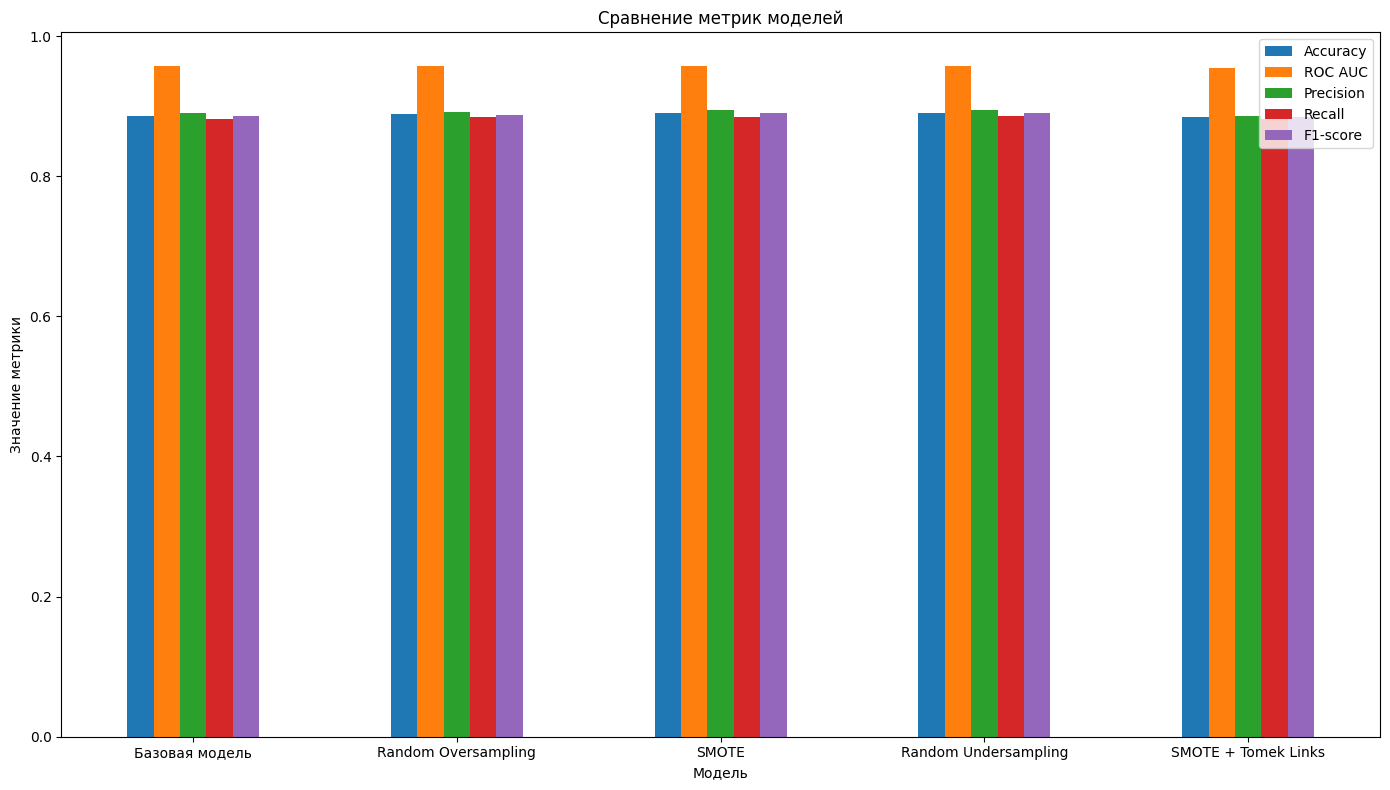

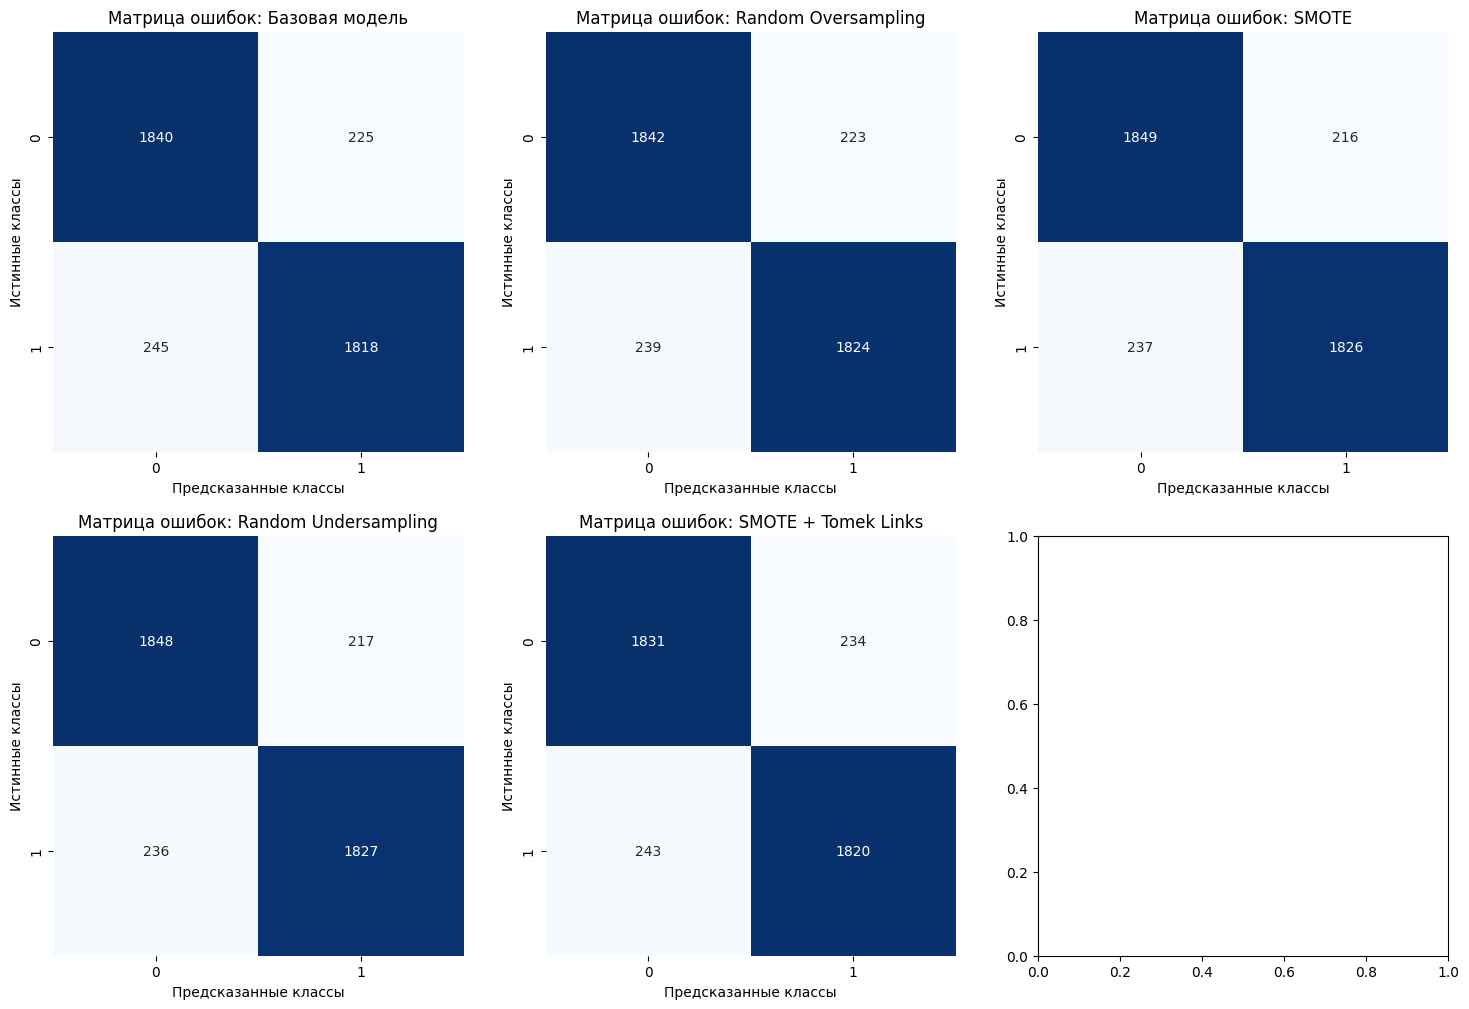

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

# Библиотека для балансировки данных
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek

# Игнорирование предупреждений
import warnings
warnings.filterwarnings('ignore')

# Шаг 1: Загрузка и Исследование Датасета
print("Загрузка датасета 'California Housing'...")
california = fetch_california_housing(as_frame=True)
X = california.data
y_reg = california.target

# Преобразование задачи регрессии в задачу классификации
# Класс 1: цена дома выше медианы
# Класс 0: цена дома ниже или равна медиане
median_price = y_reg.median()
y = (y_reg > median_price).astype(int)

# Создание DataFrame для удобства
df = X.copy()
df['MedHouseVal'] = y

# Обзор распределения классов
plt.figure(figsize=(6,4))
sns.countplot(x='MedHouseVal', data=df)
plt.title('Распределение классов')
plt.xlabel('Класс (0: ≤ Медиана, 1: > Медиана)')
plt.ylabel('Количество')
plt.show()

print("Распределение классов:")
print(df['MedHouseVal'].value_counts())

# Шаг 2: Разделение Данных на Обучающую и Тестовую Выборки
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nРазмер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")

# Проверка распределения классов в обучающей выборке
print("\nРаспределение классов в обучающей выборке:")
print(y_train.value_counts())

# Визуализация распределения классов в обучающей выборке
plt.figure(figsize=(6,4))
sns.countplot(x=y_train)
plt.title('Распределение классов в обучающей выборке')
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.show()

# Шаг 3: Анализ Распределения Классов
class_counts = y_train.value_counts()
print("\nДоля классов в обучающей выборке:")
print(class_counts / len(y_train))

# Шаг 4: Применение Методов Балансировки
# Поскольку классы уже сбалансированы, применение методов балансировки не изменит данные

# a. Случайное Oversampling
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train)
print("\nРаспределение классов после Random Oversampling:")
print(y_ros.value_counts())

# Визуализация
plt.figure(figsize=(6,4))
sns.countplot(x=y_ros)
plt.title('Распределение классов после Random Oversampling')
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.show()

# b. SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)
print("\nРаспределение классов после SMOTE:")
print(y_smote.value_counts())

# Визуализация
plt.figure(figsize=(6,4))
sns.countplot(x=y_smote)
plt.title('Распределение классов после SMOTE')
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.show()

# c. Random Undersampling
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_train, y_train)
print("\nРаспределение классов после Random Undersampling:")
print(y_rus.value_counts())

# Визуализация
plt.figure(figsize=(6,4))
sns.countplot(x=y_rus)
plt.title('Распределение классов после Random Undersampling')
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.show()

# d. SMOTE + Tomek Links
smt = SMOTETomek(random_state=42)
X_smt, y_smt = smt.fit_resample(X_train, y_train)
print("\nРаспределение классов после SMOTE + Tomek Links:")
print(y_smt.value_counts())

# Визуализация
plt.figure(figsize=(6,4))
sns.countplot(x=y_smt)
plt.title('Распределение классов после SMOTE + Tomek Links')
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.show()

# Шаг 5: Обучение Моделей и Оценка Метрик

# Функция для обучения модели и оценки метрик
def train_evaluate_model(X_tr, y_tr, X_te, y_te, description):
    model = GradientBoostingClassifier(random_state=42)
    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_te)
    y_proba = model.predict_proba(X_te)[:,1]

    print(f"--- {description} ---")
    print("Метрики качества:")
    print(classification_report(y_te, y_pred))
    acc = accuracy_score(y_te, y_pred)
    roc = roc_auc_score(y_te, y_proba)
    print(f"Точность (Accuracy): {acc:.4f}")
    print(f"AUC-ROC: {roc:.4f}")
    print("\nМатрица ошибок:")
    print(confusion_matrix(y_te, y_pred))
    print("\n" + "="*50 + "\n")

# a. Базовая Модель (Без Балансировки)
train_evaluate_model(X_train, y_train, X_test, y_test, "Базовая модель (без балансировки)")

# b. Модель после Random Oversampling
train_evaluate_model(X_ros, y_ros, X_test, y_test, "Модель после Random Oversampling")

# c. Модель после SMOTE
train_evaluate_model(X_smote, y_smote, X_test, y_test, "Модель после SMOTE")

# d. Модель после Random Undersampling
train_evaluate_model(X_rus, y_rus, X_test, y_test, "Модель после Random Undersampling")

# e. Модель после SMOTE + Tomek Links
train_evaluate_model(X_smt, y_smt, X_test, y_test, "Модель после SMOTE + Tomek Links")

# Шаг 6: Сравнение Метрик Моделей

# Сбор метрик в таблицу
metrics = {}

# Базовая модель
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]
metrics['Базовая модель'] = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'ROC AUC': roc_auc_score(y_test, y_proba),
    'Precision': classification_report(y_test, y_pred, output_dict=True)['1']['precision'],
    'Recall': classification_report(y_test, y_pred, output_dict=True)['1']['recall'],
    'F1-score': classification_report(y_test, y_pred, output_dict=True)['1']['f1-score']
}

# Random Oversampling
model_ros = GradientBoostingClassifier(random_state=42)
model_ros.fit(X_ros, y_ros)
y_pred_ros = model_ros.predict(X_test)
y_proba_ros = model_ros.predict_proba(X_test)[:,1]
metrics['Random Oversampling'] = {
    'Accuracy': accuracy_score(y_test, y_pred_ros),
    'ROC AUC': roc_auc_score(y_test, y_proba_ros),
    'Precision': classification_report(y_test, y_pred_ros, output_dict=True)['1']['precision'],
    'Recall': classification_report(y_test, y_pred_ros, output_dict=True)['1']['recall'],
    'F1-score': classification_report(y_test, y_pred_ros, output_dict=True)['1']['f1-score']
}

# SMOTE
model_smote = GradientBoostingClassifier(random_state=42)
model_smote.fit(X_smote, y_smote)
y_pred_smote = model_smote.predict(X_test)
y_proba_smote = model_smote.predict_proba(X_test)[:,1]
metrics['SMOTE'] = {
    'Accuracy': accuracy_score(y_test, y_pred_smote),
    'ROC AUC': roc_auc_score(y_test, y_proba_smote),
    'Precision': classification_report(y_test, y_pred_smote, output_dict=True)['1']['precision'],
    'Recall': classification_report(y_test, y_pred_smote, output_dict=True)['1']['recall'],
    'F1-score': classification_report(y_test, y_pred_smote, output_dict=True)['1']['f1-score']
}

# Random Undersampling
model_rus = GradientBoostingClassifier(random_state=42)
model_rus.fit(X_rus, y_rus)
y_pred_rus = model_rus.predict(X_test)
y_proba_rus = model_rus.predict_proba(X_test)[:,1]
metrics['Random Undersampling'] = {
    'Accuracy': accuracy_score(y_test, y_pred_rus),
    'ROC AUC': roc_auc_score(y_test, y_proba_rus),
    'Precision': classification_report(y_test, y_pred_rus, output_dict=True)['1']['precision'],
    'Recall': classification_report(y_test, y_pred_rus, output_dict=True)['1']['recall'],
    'F1-score': classification_report(y_test, y_pred_rus, output_dict=True)['1']['f1-score']
}

# SMOTE + Tomek Links
model_smt = GradientBoostingClassifier(random_state=42)
model_smt.fit(X_smt, y_smt)
y_pred_smt = model_smt.predict(X_test)
y_proba_smt = model_smt.predict_proba(X_test)[:,1]
metrics['SMOTE + Tomek Links'] = {
    'Accuracy': accuracy_score(y_test, y_pred_smt),
    'ROC AUC': roc_auc_score(y_test, y_proba_smt),
    'Precision': classification_report(y_test, y_pred_smt, output_dict=True)['1']['precision'],
    'Recall': classification_report(y_test, y_pred_smt, output_dict=True)['1']['recall'],
    'F1-score': classification_report(y_test, y_pred_smt, output_dict=True)['1']['f1-score']
}

# Создание DataFrame
metrics_df = pd.DataFrame(metrics).T
print("\nСравнение метрик моделей:")
print(metrics_df)

# Шаг 7: Визуализация Метрик

# Визуализация метрик
metrics_df.plot(kind='bar', figsize=(14,8))
plt.title('Сравнение метрик моделей')
plt.xlabel('Модель')
plt.ylabel('Значение метрики')
plt.xticks(rotation=0)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Шаг 8: Визуализация Матриц Ошибок

# Получение матриц ошибок для всех методов
def get_confusion_matrix_model(X_tr, y_tr, X_te, y_te):
    model = GradientBoostingClassifier(random_state=42)
    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_te)
    return confusion_matrix(y_te, y_pred)

cm_baseline = get_confusion_matrix_model(X_train, y_train, X_test, y_test)
cm_ros = get_confusion_matrix_model(X_ros, y_ros, X_test, y_test)
cm_smote = get_confusion_matrix_model(X_smote, y_smote, X_test, y_test)
cm_rus = get_confusion_matrix_model(X_rus, y_rus, X_test, y_test)
cm_smt = get_confusion_matrix_model(X_smt, y_smt, X_test, y_test)

# Создание словаря матриц ошибок
cm_dict = {
    'Базовая модель': cm_baseline,
    'Random Oversampling': cm_ros,
    'SMOTE': cm_smote,
    'Random Undersampling': cm_rus,
    'SMOTE + Tomek Links': cm_smt
}

# Визуализация матриц ошибок
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for idx, (key, cm) in enumerate(cm_dict.items()):
    if idx >= 6:
        break
    plt.subplot(2, 3, idx+1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Матрица ошибок: {key}')
    plt.xlabel('Предсказанные классы')
    plt.ylabel('Истинные классы')
